In [86]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.ndimage as nd
from scipy.ndimage import grey_opening

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    return data[tuple(ind)]


In [93]:
images = glob.glob('/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/???_lamella?_montage.tif')
for image_fn in images:
    image = np.int32(imread(image_fn))
    bright_mask = image > 12000
    dark_mask = image < 500 
    mask = np.invert(bright_mask | dark_mask)
    masked_image = fill(image,np.invert(mask))
    opened_image = grey_opening(masked_image, size=15)
    corr_image = (image) -nd.gaussian_filter(opened_image,200)
    corr_image[corr_image < 0.0] = 0.0
    corr_image[corr_image > 5000.0] = 5000.0
    corr_image = np.uint16(corr_image)
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/{image_fn[-24:-4]}_tophat15.tif',corr_image+1000)
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/{image_fn[-24:-4]}_opened15.tif',nd.gaussian_filter(opened_image,200))
    

/tmp/ipykernel_68039/1490147839.py:14: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/fff_lamella2_montage_opened15.tif is a low contrast image
  imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/{image_fn[-24:-4]}_opened15.tif',nd.gaussian_filter(opened_image,200))
/tmp/ipykernel_68039/1490147839.py:14: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/euc_lamella1_montage_opened15.tif is a low contrast image
  imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/{image_fn[-24:-4]}_opened15.tif',nd.gaussian_filter(opened_image,200))
/tmp/ipykernel_68039/1490147839.py:14: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/fff_lamella1_montage_opened15.tif is a low contrast image
  imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly/{image_fn[-24:-4]}_opened15.tif',nd.gaussian_filter(opened_imag

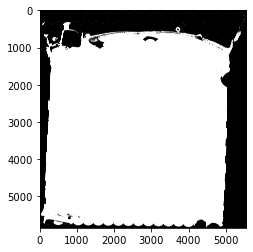

In [51]:
plt.imshow(mask,cmap='gray')

In [52]:
np.mean(image[mask])

5768.945632104361

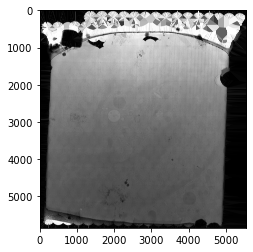

In [54]:
plt.imshow(masked_image,cmap='gray')

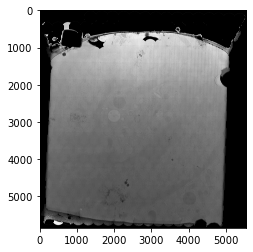

In [55]:
plt.imshow(image*mask,cmap='gray')

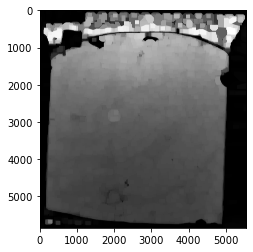

In [58]:
plt.imshow(opened_image,cmap='gray')

In [66]:
imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))

/tmp/ipykernel_68039/971652425.py:1: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif is a low contrast image
  imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))
